# Maxima verosimilitud y el límite de los datos faltantes

Hay veces que la estimación por máxima verosimilitud no es factible debido a que existen datos faltantes, y la función de MV requiere disponer de datos completos. Estos datos faltantes pueden ser debidos a errores en la medición, a que no se recogieron datos, o simplemente por la estructura del modelo (como en el cazo del Modelo de Mezcla de Gaussianas).

En estas situaciones la función de máxima verosimilitud se transforma en una función donde la maximización se hace sobre los datos observados y se marginaliza sobre los datos faltantes. Esta marginalización emplea suma (como en el caso de MG) o integración (como Datasets Incompletos) de la verosimilitud de los datos faltantes. Esto tiene como resultado una función logarítmica (con suma o integración) que no tiene una solución analítica. 

## Forma General del Problema

La “presencia” de datos o variables faltantes requiere que se marginalicen del cálculo de probabilidad de los datos observados. Esto se puede hacer de dos maneras dependiendo de la naturaleza de los datos faltantes:
- Mediante suma, o  
- Mediante integración

Esto resulta en una estimación de máxima verosimilitud de la forma:

$[ log L(theta) = \sum_{i=1}^{n} \log \int p(x_i, z_i | \theta) \, dz_i ]$

La suma interna también puede ser una integral en algunos problemas,      
Introducimos explícitamente $(\theta)$ en el lado derecho (RHS) para mostrar que la probabilidad se calcula mediante un modelo con parámetros $(\theta)$ que deben ser estimados.   

Este logaritmo de una integral (o suma) es lo que hace que la estimación sea desafiante, ya que no hay una solución analítica directa y se requiere el uso de algoritmos iterativos como el algoritmo EM (Expectation-Maximization).



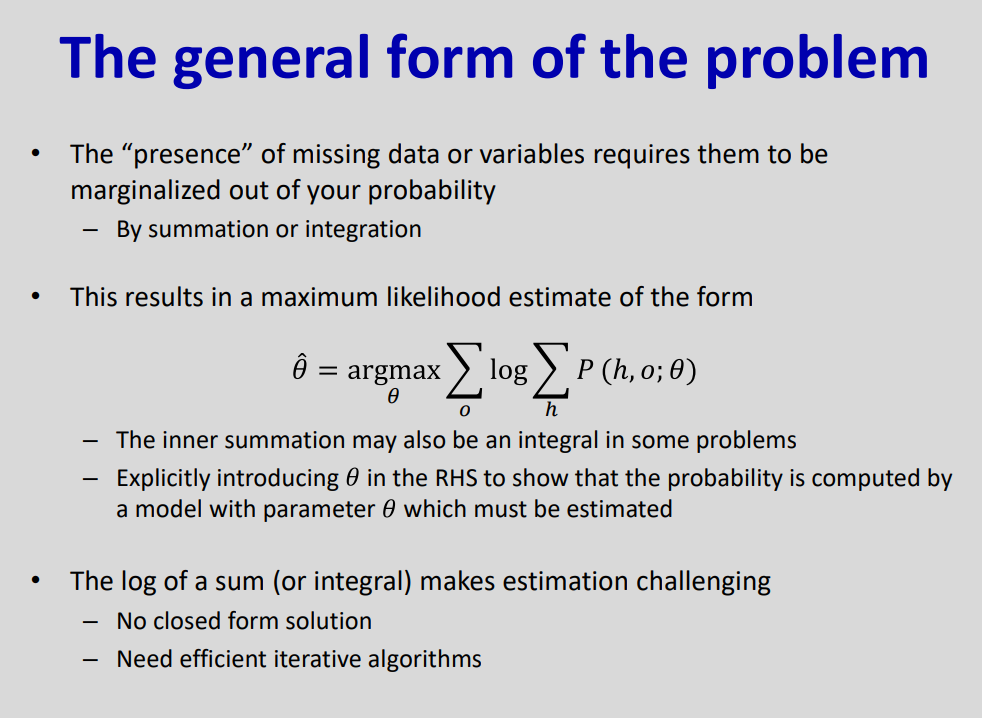

## Ejemplo de Máxima Verosimilitud con Datos Faltantes utilizando el Algoritmo EM

En este ejemplo, vamos a comprender por qué no es posible resolver logaritmos de integrales de manera analítica en el contexto de la función de máxima verosimilitud cuando hay datos faltantes y cómo el método EM (Expectation-Maximization) puede ayudar en estos casos.

### Suposiciones Iniciales

Supongamos que tenemos un dataset con tres observaciones de una variable aleatoria normalmente distribuida, pero uno de los datos está faltante:

$[ X = \{x_1, x_2, x_3\} ]$

donde $( x_3 )$ es el dato faltante.

Para simplificar, supongamos que queremos estimar la media $( \mu )$ de la distribución normal $( N(\mu, \sigma^2) )$, asumiendo que la varianza $( \sigma^2 )$ es conocida.

### Paso 1: Definir la Función de Verosimilitud

La función de verosimilitud completa, si tuviéramos todos los datos, sería:

$[ L(\mu | x_1, x_2, x_3) = \prod_{i=1}^{3} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right) ]$

### Paso 2: Marginalizar sobre el Dato Faltante

Dado que $( x_3 )$ es faltante, tenemos que integrar sobre su distribución condicional para obtener la verosimilitud marginalizada:

$[ L(\mu | x_1, x_2) = \int L(\mu | x_1, x_2, x_3) p(x_3) \, dx_3 ]$

### Paso 3: Aplicar el Logaritmo de la Verosimilitud

Tomar el logaritmo de la función de verosimilitud marginalizada puede ser complejo debido a la integral, y en la mayoría de los casos no tiene una solución analítica simple. Por esta razón, se recurre a métodos numéricos como el algoritmo EM.




# Ejemplo en Python utilizando EM
Vamos a implementar un ejemplo simple en Python utilizando el algoritmo EM para estimar la media μ.

In [1]:
import numpy as np
from scipy.stats import norm

# Datos conocidos
x1 = 5.0
x2 = 7.0

# Dato faltante
x3 = np.nan

# Estimación inicial de la media
mu_est = 0.0
sigma = 2.0  # Supongamos que la varianza es conocida y es 4 (sigma=2)

# Algoritmo EM
tolerance = 1e-6
max_iterations = 1000
log_likelihood_old = -np.inf

for iteration in range(max_iterations):
    # E-step: Calcular la esperanza del dato faltante
    if np.isnan(x3):
        expected_x3 = mu_est  # En este caso simple, la esperanza es la media estimada
    else:
        expected_x3 = x3
    
    # M-step: Maximizar la función de verosimilitud
    mu_est = np.mean([x1, x2, expected_x3])
    
    # Calcular la log-verosimilitud
    log_likelihood = (
        np.log(norm.pdf(x1, mu_est, sigma)) +
        np.log(norm.pdf(x2, mu_est, sigma)) +
        np.log(norm.pdf(expected_x3, mu_est, sigma))
    )
    
    if np.abs(log_likelihood - log_likelihood_old) < tolerance:
        break
    log_likelihood_old = log_likelihood

print(f'Estimación de la media (mu): {mu_est}')


Estimación de la media (mu): 5.999695168419449


### Introducción a las Integrales

Las integrales son una herramienta matemática utilizada para calcular el área bajo una curva, la acumulación de una cantidad, o más generalmente, el valor acumulado de una función a lo largo de un intervalo.

#### Elementos de una Integral

1. **Función a integrar (Integrando)**: La función que se quiere integrar, denotada como $( f(x) )$.
2. **Intervalo de integración**: Los límites entre los cuales se realiza la integración, denotados como $( [a, b] )$.

La notación general para una integral definida es:

$[ \int_{a}^{b} f(x) \, dx ]$

donde:
- $( \int )$ es el símbolo de la integral.
- $( f(x) )$ es la función integrando.
- $( a )$ y $( b )$ son los límites de integración.
- $( dx )$ indica que la integración se realiza con respecto a la variable $( x )$.

### Supuestos

- La función $( f(x) )$ debe ser integrable en el intervalo $( [a, b] )$. Esto generalmente significa que la función debe ser continua o tener un número finito de discontinuidades en ese intervalo.

### Utilidad y Aplicación

Las integrales tienen muchas aplicaciones en diversas áreas como:
- **Cálculo de áreas y volúmenes**: Encontrar el área bajo una curva o el volumen de un sólido de revolución.
- **Física**: Calcular cantidades como trabajo, energía, y flujo.
- **Probabilidad y Estadística**: Encontrar probabilidades y esperanzas matemáticas de variables aleatorias continuas.

### Ejemplo en Python

Vamos a calcular el área bajo la curva de la función $( f(x) = x^2 )$ en el intervalo $([0, 2])$.

#### Paso 1: Definir la función

Definimos la función $( f(x) = x^2 )$.

In [2]:
def f(x):
    return x ** 2

#### Paso 2: Importar la función de integración y calcular la integral


Usamos la función `quad` de la biblioteca `scipy` para calcular la integral.

In [3]:
from scipy.integrate import quad

# Definimos los límites de integración
a = 0
b = 2

# Calculamos la integral
integral, error = quad(f, a, b)

print(f'El valor de la integral de x^2 en el intervalo [0, 2] es: {integral}')

El valor de la integral de x^2 en el intervalo [0, 2] es: 2.666666666666667


### Visualización Gráfica (Opcional)

Podemos visualizar la función y el área bajo la curva usando `matplotlib`.

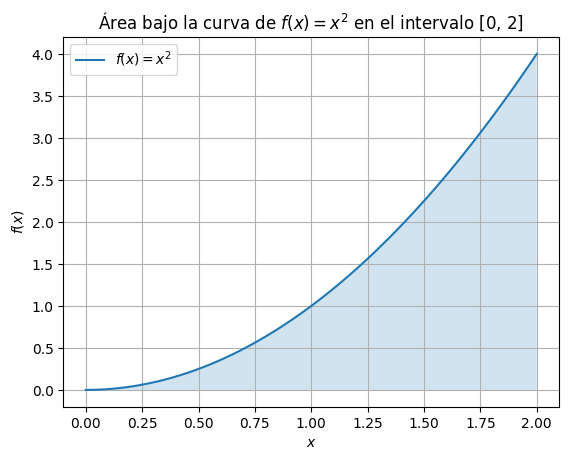

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Crear un conjunto de puntos para x
x = np.linspace(0, 2, 100)
y = f(x)

# Crear la gráfica
plt.plot(x, y, label='$f(x) = x^2$')
plt.fill_between(x, y, alpha=0.2)

# Añadir etiquetas y título
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Área bajo la curva de $f(x) = x^2$ en el intervalo [0, 2]')
plt.legend()
plt.grid(True)
plt.show()



Este código genera una gráfica de la función $( f(x) = x^2 )$ y sombrea el área bajo la curva en el intervalo $([0, 2])$, que corresponde al valor de la integral calculada.


# Problema de Calcular el Logaritmo Directamente

El problema de calcular el logaritmo de una integral directamente radica en que, en muchos casos prácticos, la integral no tiene una solución analítica simple. Además, integrar una función puede ser costoso computacionalmente y propenso a errores numéricos, especialmente si la función tiene una forma complicada o el intervalo de integración es grande.

En contextos como el de la máxima verosimilitud con datos faltantes, la función de verosimilitud puede ser compleja y dependiente de múltiples parámetros. Marginalizar sobre los datos faltantes implica integrar sobre las posibles distribuciones de esos datos, lo que añade otra capa de complejidad.

### Integración Numérica y sus Desafíos

#### 1. **Costo Computacional**

Integrar una función numéricamente implica realizar un gran número de cálculos para aproximar el área bajo la curva de la función. Dependiendo de la forma de la función y el intervalo de integración, este proceso puede ser muy intensivo en términos de recursos computacionales.

- **Gran número de evaluaciones**: Para obtener una buena precisión, es necesario evaluar la función en muchos puntos dentro del intervalo de integración. Esto es especialmente cierto si la función tiene muchas variaciones o es muy compleja.
- **Algoritmos de integración**: Algunos algoritmos como el método de trapecios o Simpson son relativamente simples pero pueden requerir muchas evaluaciones de la función para ser precisos. Métodos más sofisticados, como el método de cuadratura adaptativa, intentan minimizar el número de evaluaciones adaptándose a la forma de la función, pero aún así pueden ser computacionalmente intensivos.

#### 2. **Errores Numéricos**

Cuando realizamos integración numérica, hay varios tipos de errores que pueden surgir:

- **Errores de redondeo**: Los cálculos en una computadora tienen una precisión finita debido a la representación de los números en punto flotante. Esto puede llevar a errores acumulativos en cálculos repetidos.
- **Errores de truncamiento**: Al aproximar una integral mediante una suma finita (por ejemplo, usando sumas de Riemann), siempre hay una diferencia entre el valor verdadero de la integral y la suma calculada. Este error de truncamiento puede ser significativo si la función tiene muchas oscilaciones o discontinuidades.
- **Funciones complicadas**: Si la función tiene singularidades, discontinuidades, o es altamente oscilatoria, los algoritmos de integración pueden tener dificultades para converger a un resultado preciso.

#### 3. **Intervalos de Integración Grandes**

Integrar sobre intervalos grandes introduce varios problemas adicionales:

- **Subdivisiones**: Un intervalo grande a menudo necesita ser subdividido en muchas partes pequeñas para aplicar métodos de integración numérica con precisión. Esto aumenta el número de evaluaciones de la función y, por lo tanto, el costo computacional.
- **Acumulación de errores**: A medida que aumentamos el intervalo de integración, los errores de redondeo y truncamiento se acumulan, lo que puede llevar a una pérdida significativa de precisión.

### Ejemplo de Python

Vamos a ilustrar algunos de estos problemas con un ejemplo en Python.

#### Ejemplo 1: Integración de una función simple en un intervalo grande

Consideremos la función $( f(x) = \sin(x) )$ y vamos a integrarla en el intervalo $([0, 1000])$.

In [5]:
import numpy as np
from scipy.integrate import quad

# Definir la función
def f(x):
    return np.sin(x)

# Definir los límites de integración
a = 0
b = 1000

# Calcular la integral
integral, error = quad(f, a, b)

print(f'El valor de la integral de sin(x) en el intervalo [{a}, {b}] es: {integral}')
print(f'Error estimado: {error}')

El valor de la integral de sin(x) en el intervalo [0, 1000] es: 0.43761205837776884
Error estimado: 101.02191325571289


/tmp/ipykernel_142577/3795498471.py:13: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, error = quad(f, a, b)


En este caso, aunque la función $( \sin(x) )$ es simple, el intervalo de integración es grande. El resultado de la integral es muy sensible a errores numéricos debido a la oscilación de la función.

#### Ejemplo 2: Función con comportamiento complicado

Consideremos la función $( f(x) = \frac{\sin(1/x)}{x} )$ y vamos a integrarla en el intervalo $([0.01, 1])$.


In [6]:
# Definir la función
def f(x):
    return np.sin(1/x) / x

# Definir los límites de integración
a = 0.01
b = 1

# Calcular la integral
integral, error = quad(f, a, b)

print(f'El valor de la integral de sin(1/x)/x en el intervalo [{a}, {b}] es: {integral}')
print(f'Error estimado: {error}')

El valor de la integral de sin(1/x)/x en el intervalo [0.01, 1] es: 0.6161423965218736
Error estimado: 7.676240603589728e-09


En este caso, la función $( \frac{\sin(1/x)}{x} )$ tiene un comportamiento complicado cerca de $( x = 0 )$, lo que puede introducir errores significativos en la integración numérica.

### Conclusión

Integrar una función puede ser costoso computacionalmente y propenso a errores numéricos por varias razones:
- **Número de evaluaciones**: Funciones complejas o intervalos grandes requieren muchas evaluaciones de la función.
- **Errores numéricos**: Los errores de redondeo y truncamiento pueden acumularse.
- **Comportamiento de la función**: Funciones oscilatorias, con singularidades o discontinuidades presentan desafíos adicionales.

Estos problemas hacen que las integraciones numéricas sean una tarea no trivial, especialmente en aplicaciones como el cálculo de verosimilitud en presencia de datos faltantes, donde se deben integrar funciones de probabilidad complejas.

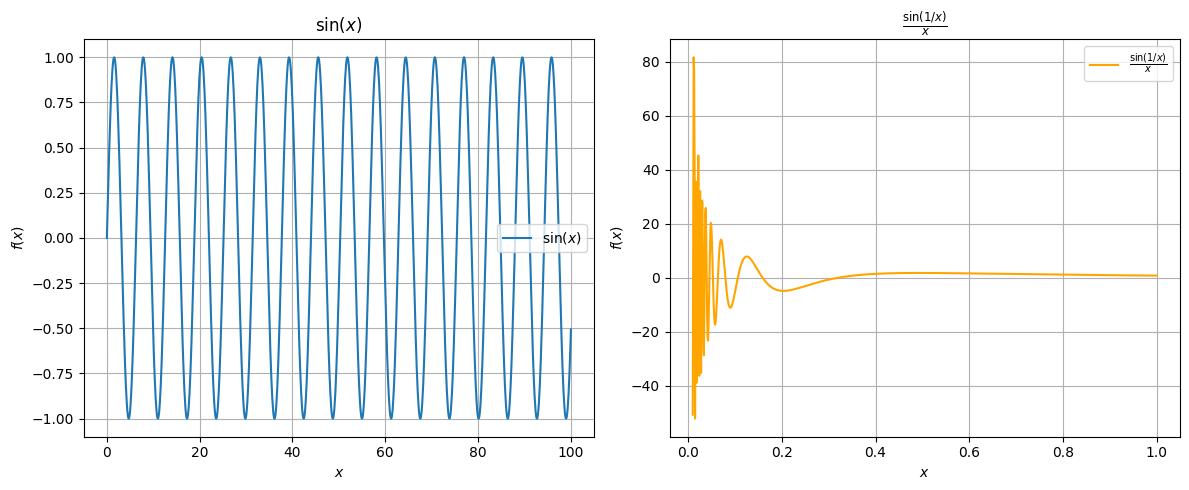

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las funciones
def f1(x):
    return np.sin(x)

def f2(x):
    return np.sin(1/x) / x

# Crear el conjunto de puntos para graficar
x1 = np.linspace(0, 100, 1000)  # Para la función sin(x) en un intervalo más pequeño para mejor visualización
x2 = np.linspace(0.01, 1, 1000)  # Para la función sin(1/x)/x

# Calcular los valores de las funciones
y1 = f1(x1)
y2 = f2(x2)

# Crear la gráfica para la primera función
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x1, y1, label='$\sin(x)$')
plt.title('$\sin(x)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid(True)
plt.legend()

# Crear la gráfica para la segunda función
plt.subplot(1, 2, 2)
plt.plot(x2, y2, label='$\\frac{\sin(1/x)}{x}$', color='orange')
plt.title('$\\frac{\sin(1/x)}{x}$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid(True)
plt.legend()

# Mostrar las gráficas
plt.tight_layout()
plt.show()


# La solución: Variational Lower Bound

La solución al problema de calcular el logaritmo de una integral en la máxima verosimilitud con datos faltantes es utilizar una técnica llamada "Variational Lower Bound" (VBL). Esta técnica proporciona una forma de aproximar la integral logarítmica mediante una cota inferior que es más fácil de calcular y optimizar.



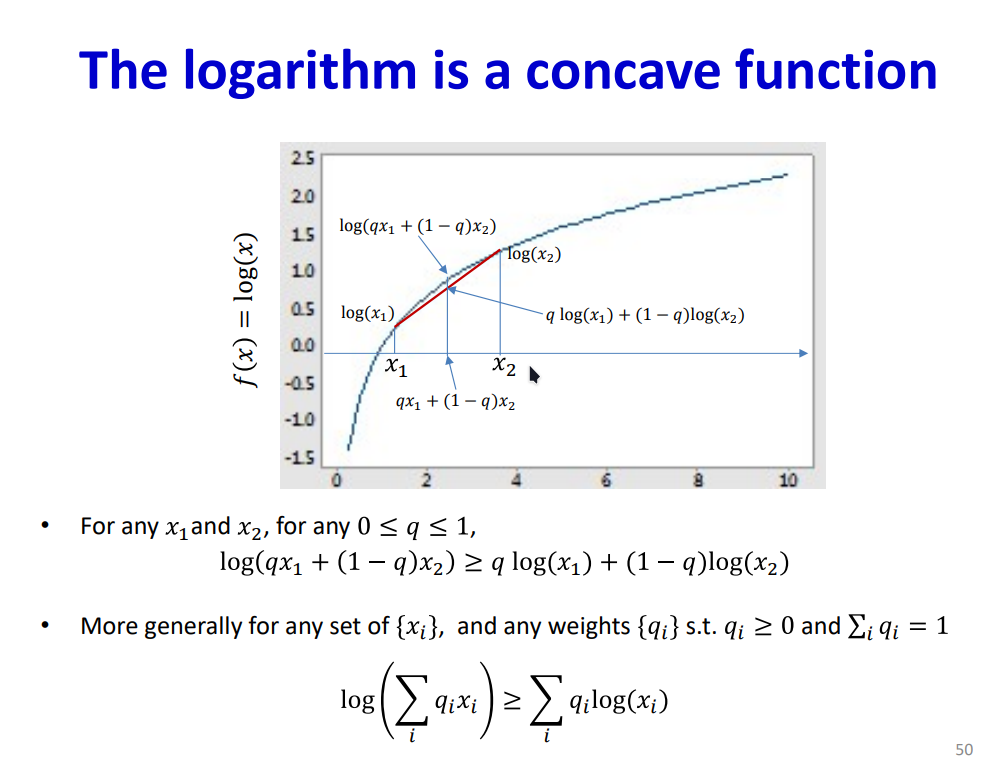

## Maximizacion de expectativas (un caso de VBL)

La idea detrás de la VBL es maximizar una cota inferior de la función de verosimilitud en lugar de la función de verosimilitud directamente. Esto se hace introduciendo una distribución auxiliar (también llamada distribución variacional) que se ajusta a la distribución posterior de los datos faltantes. La cota inferior se obtiene a través de la divergencia de Kullback-Leibler entre la distribución variacional y la distribución posterior.

### Probabilidad Condicional

La probabilidad condicional $( P(A|B) )$ es la probabilidad de que ocurra el evento $( A )$ dado que ha ocurrido el evento $( B )$. Matemáticamente, se define como:

$[ P(A|B) = \frac{P(A \cap B)}{P(B)} ]$

donde $( P(A \cap B) )$ es la probabilidad conjunta de que ocurran tanto $( A )$ como $( B )$, y $( P(B) )$ es la probabilidad de que ocurra $( B )$.

### Expectation-Maximization (EM)

El algoritmo EM es un método iterativo para encontrar los parámetros de un modelo estadístico en presencia de datos incompletos o faltantes. Se compone de dos pasos principales:

1. **E-step (Expectation step)**: En este paso, calculamos la esperanza (expectation) del logaritmo de la función de verosimilitud completa, con respecto a la distribución condicional de los datos faltantes, dados los datos observados y los parámetros actuales.
2. **M-step (Maximization step)**: En este paso, maximizamos la esperanza calculada en el E-step con respecto a los parámetros del modelo.

### Completar los Datos Faltantes con la Probabilidad Condicional

La idea de "completar los datos faltantes con la probabilidad condicional de los datos observados" se refiere al proceso que ocurre en el E-step del algoritmo EM. Aquí está una explicación detallada:

1. **Datos Observados y Faltantes**: Supongamos que tenemos datos observados $( X )$ y datos faltantes $( Z )$. Nuestro objetivo es maximizar la verosimilitud $( L(\theta) )$ del modelo, donde $( \theta )$ son los parámetros del modelo.

2. **Probabilidad Condicional**: En el E-step, utilizamos la probabilidad condicional de los datos faltantes $( Z )$ dados los datos observados $( X )$ y los parámetros actuales $( \theta )$. Esta probabilidad condicional nos dice cómo es probable que sean los datos faltantes, dado lo que hemos observado y nuestros supuestos actuales sobre el modelo.

3. **Esperanza del Logaritmo de la Verosimilitud Completa**: Calculamos la esperanza del logaritmo de la función de verosimilitud completa $( \log L(X, Z | \theta) )$ con respecto a la distribución condicional de $( Z )$ dado $( X )$ y $( \theta )$:

\[ Q(\theta | \theta^{(t)}) = \mathbb{E}_{Z|X, \theta^{(t)}} [\log L(X, Z | \theta)] \]

donde $( \theta^{(t)} )$ son los parámetros estimados en la iteración anterior.

4. **Maximización**: En el M-step, maximizamos $( Q(\theta | \theta^{(t)}) )$ con respecto a $( \theta )$ para obtener nuevos valores de los parámetros.

### Ejemplo Sencillo

Supongamos que estamos tratando de estimar la media $( \mu )$ de una distribución normal con algunos datos faltantes.

#### E-step:
1. Calculamos la esperanza de los datos faltantes $( Z )$ dados los datos observados $( X )$ y los parámetros actuales $( \mu^{(t)} )$.
2. En este paso, podemos considerar que la esperanza de los datos faltantes $( Z )$ se completa usando su valor esperado condicional $( \mathbb{E}[Z | X, \mu^{(t)}] )$.

#### M-step:
1. Usamos los datos observados $( X )$ y los datos "completados" (la esperanza calculada en el E-step) para maximizar la verosimilitud y actualizar la estimación de $( \mu )$.

### Conclusión

En resumen, completar los datos faltantes con la probabilidad condicional de los datos observados significa utilizar la probabilidad condicional de los datos faltantes dado lo observado para calcular su valor esperado (esperanza) y luego usar esta información para actualizar los parámetros del modelo iterativamente. Esto es esencialmente lo que ocurre en el E-step del algoritmo EM, permitiendo manejar datos faltantes de manera efectiva y maximizar la función de verosimilitud.

### Ejemplo en Python

Veamos un ejemplo simple en Python para ilustrar este proceso.

In [16]:
import numpy as np
from scipy.stats import norm

# Datos observados
x_observed = np.array([5.0, 7.0])

# Supongamos que inicialmente estimamos que la media es 6.0
mu_est = 6.0
sigma = 2.0  # Supongamos que la varianza es conocida

# Dato faltante
x_missing = np.nan

# Algoritmo EM
tolerance = 1e-6
max_iterations = 1000
log_likelihood_old = -np.inf

for iteration in range(max_iterations):
    # E-step: Calcular la esperanza del dato faltante
    if np.isnan(x_missing):
        # En este caso simple, la esperanza es la media estimada actualmente
        expected_x_missing = mu_est
    else:
        expected_x_missing = x_missing
    
    # M-step: Maximizar la función de verosimilitud
    mu_est = np.mean(np.append(x_observed, expected_x_missing))
    
    # Calcular la log-verosimilitud
    log_likelihood = (
        np.sum(np.log(norm.pdf(x_observed, mu_est, sigma))) +
        np.log(norm.pdf(expected_x_missing, mu_est, sigma))
    )
    
    if np.abs(log_likelihood - log_likelihood_old) < tolerance:
        break
    log_likelihood_old = log_likelihood

print(f'Estimación de la media (mu): {mu_est}')

Estimación de la media (mu): 6.0


### Explicación

1. **Inicialización**: Comienzas con una estimación inicial de \(\mu\) (por ejemplo, 6.0).
2. **E-step**: Calculas la esperanza del dato faltante `x_missing` utilizando la estimación actual de \(\mu\) (`mu_est`). En este caso simple, `expected_x_missing` se establece igual a `mu_est`.
3. **M-step**: Actualizas la estimación de \(\mu\) utilizando tanto los datos observados (`x_observed`) como el dato completado (`expected_x_missing`).
4. **Iteración**: Repites estos pasos hasta que la log-verosimilitud converge, es decir, hasta que el cambio en la log-verosimilitud entre iteraciones es menor que una tolerancia predefinida.



### Completar valores faltantes con la probabilidad condicional

Se puede, también. extraer una muestra de la distribución normal con la media y varianza actuales del modelo es una forma válida de aproximar el valor de los datos faltantes. Esto se conoce como **imputación estocástica** y puede ser útil en algunos contextos.

### Imputación Estocástica

En lugar de utilizar la media estimada como el valor esperado del dato faltante, puedes extraer una muestra de la distribución normal con los parámetros estimados. Esto puede añadir variabilidad y hacer que la imputación sea más realista, ya que incorpora la incertidumbre en la estimación.

### Modificación del Algoritmo EM

Vamos a modificar el algoritmo EM para completar `expected_x_missing` utilizando una muestra extraída de la distribución normal con los parámetros estimados.

### Ejemplo en Python

In [17]:
import numpy as np
from scipy.stats import norm

# Datos observados
x_observed = np.array([5.0, 7.0])

# Supongamos que inicialmente estimamos que la media es 6.0
mu_est = 6.0
sigma = 2.0  # Supongamos que la varianza es conocida

# Dato faltante
x_missing = np.nan

# Algoritmo EM con imputación estocástica
tolerance = 1e-6
max_iterations = 1000
log_likelihood_old = -np.inf

for iteration in range(max_iterations):
    # E-step: Calcular la esperanza del dato faltante
    if np.isnan(x_missing):
        # Extraer una muestra de la distribución normal con los parámetros estimados
        expected_x_missing = np.random.normal(mu_est, sigma)
    else:
        expected_x_missing = x_missing
    
    # M-step: Maximizar la función de verosimilitud
    mu_est = np.mean(np.append(x_observed, expected_x_missing))
    
    # Calcular la log-verosimilitud
    log_likelihood = (
        np.sum(np.log(norm.pdf(x_observed, mu_est, sigma))) +
        np.log(norm.pdf(expected_x_missing, mu_est, sigma))
    )
    
    if np.abs(log_likelihood - log_likelihood_old) < tolerance:
        break
    log_likelihood_old = log_likelihood

print(f'Estimación de la media (mu): {mu_est}')


Estimación de la media (mu): 5.992684803698605



### Explicación del Código

1. **Datos Observados y Estimación Inicial**: Tienes los datos observados `x_observed` y una estimación inicial de la media `mu_est`. La varianza `sigma` se asume conocida.

2. **E-step (Expectation step)**:
   - En este paso, si `x_missing` es faltante, extraes una muestra de una distribución normal con la media `mu_est` y la varianza `sigma` para obtener `expected_x_missing`.
   - Si `x_missing` no es faltante, simplemente utilizas su valor real.

3. **M-step (Maximization step)**:
   - Calculas una nueva estimación de la media `mu_est` utilizando los datos observados y el dato completado `expected_x_missing`.

4. **Iteración y Convergencia**:
   - Calculas la log-verosimilitud con la estimación actualizada y verificas la convergencia. Si el cambio en la log-verosimilitud es menor que una tolerancia predefinida, el algoritmo termina.

### Conclusión

Utilizar una muestra de la distribución normal para completar los datos faltantes es una forma válida y puede añadir variabilidad y realismo a la imputación. Esta técnica puede ser especialmente útil cuando se desea incorporar la incertidumbre en la estimación de los datos faltantes, y es coherente con el enfoque estocástico en muchos contextos estadísticos.